## Abstract 

The solar spectrum experiment goes over identifying known absorption lines in a spectrum of the sky. This is done to find ways of configuring counts (columns) into angstroms, and then overplotting the absorption lines to identify known elements in the the solar spectrum. To do this, spectrum of the sky is taken for a certain time scale (12 seconds) in order to get a clear image in the telescopes slit. Then calibrating the data from a neon spectrum that was taken through the telescope into angstroms, the absorption lines are then matched with known lines, thus showing what elements are within this particular sky spectrum that was taken. 

## Introduction

This experiment goes over how to identify spectral lines from an absorption spectrum of a given object. Any object that emits wavelengths gives off certain emission or absorption lines that have a unique pattern that can be found by knowing what certain elements look like in the absorption and emission spectrum. The spectrum taken here is in the optical light. This goes over the flux density of the light that we observed per unit wavelength. 

By taking these measurements of the absorption and emission lines from the light can identify stars uniquely based on their elements. This also helps give the relative temperature and density of the stars and their radial velocities. This experiment does not go too far into the possibilities of using spectroscopy, as we are identifying the absorption lines that are known from a spectrum of the sky (these lines include both the atmospheric absorption and from the sun). 

## Theory

Spectral dispersion the rate of change of an angle of dispersed light. This is given by the grating equation and angular dispersion:

$\mathcal{A}$ = $\frac{\partial\beta}{\partial\lambda}$ = $ \frac{m}{dcos\beta}$, which is the angular resolution.

$\Delta s = dsin\alpha + dsin\beta = m\lambda$, which gives the grating equation.

$\Delta \lambda = \lambda ' - \lambda = \frac{\lambda}{m}$

These equations come from deriving a condition between two different wavelengths of different orders that appear at the same place within a particular detector. This is set by the optical system of a spectrograph to find the displacement between the two different wavelengths of different orders.

To optomize and calibrate the wavelength scale from the spectrograph, a known spectrum source is used, such as neon. Then using known absorption lines of the spectrum source, a calibration of the wavelength scale can be made. To line up the absorption lines and the spikes in the spectrum, the following equation is used on the columns:

$\nu = \frac{Column Number}{Stretch} + Shift$

This calibrtion of the slit for neon spectrum can then be used as a calibration for the sky spectrum taken.

The elements of highest abundance are not always those with the strongest in a stellar absorption spectrum. This is because there may be sources of cooler clouds blocking the total spectrum, and thus inhibits some of the sources that would be in the highest abundance because of this temperature change. 

## Experiment and Methodology

The following code goes over the items necessary to import. There is rc, which goes over the figure size for all the following plots in this experiment.

In [298]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
%matplotlib inline
rc('figure', figsize=(12.0, 9.0))

Below is the code to find the average bias frame, which is done through marking all the bias frames, then adding them all together, and then dividing by the amount of frames taken minus one for the sigma of the summation.

In [299]:
bias = []
for i in range(1,10):
    bias.append(fits.getdata("bais0000000{}.fit".format(i) , ext=0).astype(np.int))
    avbias = sum(bias)/9   

Here, the average of the dark frames are found in order to calculate a more accurate spectrum of the sun. This average is calculated through the summation of the 3 frames taken at 12 seconds each, and then dividing by 2, which is the number of trials minus one.

In [300]:
dark = []
for i in range(1,3):
    dark.append(fits.getdata("dark0000000{}.fit".format(i) , ext=0).astype(np.int))
    avdark = sum(dark)/2

To find the average neon background, a summation of the 5 frames is done, followed by dividing by the number of frames minus one, which will help get a better look at the absorption/emission lines in the neon spectrum.

In [301]:
neonbg = []
for i in range(1,5):
    neonbg.append(fits.getdata("neonbgSGSNoTarget0000000{}.fit".format(i) , ext=0).astype(np.int))
    avneonbg = sum(neonbg)/4

Then the average of the neon spectrum is found (these frames were taken by using a neon lamp in front of the telescope), where the 3 frames are added together, and then divided by the number of frames minus one.

In [302]:
neon = []
for i in range(1,3):
    neon.append(fits.getdata("neonSGSNoTarget0000001{}.fit".format(i) , ext=0).astype(np.int))
    avneon = sum(neon)/2

Then the sky spectrum of 5 frame are summed together and then divided by the number of frames minus one. This gives a estimate of the solar spectrum in the sky.

In [303]:
sky = []
for i in range(1,5):
    sky.append(fits.getdata("skySGSNoTarget0000000{}.fit".format(i) , ext=0).astype(np.int))
    avsky = sum(sky)/4

In order to get the lines of the neon spectrum loaded, the following text file is loaded with the known lines in Angstroms ($\mathring A$) for neon. 

In [304]:
with open('neon_jdm.txt') as f:
    lines = f.readlines()
    a = [line.split()[0] for line in lines] #reads in the first column which is for the known emission/absorption
    #lines of neon.
y = np.array(list(a),dtype=float) 

print ('Neon Absorption Lines: ', y)

Neon Absorption Lines:  [  3397.866    3417.9035   3472.5711   3515.19     3593.5263   3600.1691
   4488.0926   4636.125    4837.3139   5005.1587   5031.3504   5104.7011
   5113.6724   5144.9384   5188.6122   5330.7775   5341.0938   5360.0121
   5400.5617   5562.7662   5656.5664   5689.8163   5719.2248   5748.2985
   5764.4188   5804.4496   5820.1558   5852.4878   5881.895    5944.8342
   5975.534    6029.9971   6074.3377   6096.1631   6128.4499   6143.0626
   6163.5939   6217.2812   6266.495    6304.789    6334.4278   6382.9917
   6402.246    6506.5281   6532.8822   6598.9529   6678.2764   6717.043
   6929.4673   7024.0504   7032.4131   7173.9381   7245.1666   7438.899
   7488.8712   7535.7739   8136.4057   8300.3263   8377.6065   8495.3598
   8591.2583   8634.647    8654.3831   8655.522    8679.493    8681.921
   8704.111    8771.656    8780.621    8783.75     8830.907    8853.867
   8919.5007   9148.672    9201.759    9300.853    9326.507    9425.379
   9486.68     9534.163    9665.

The averaged neon background frames are subtracted from the average neon frames, which gives a good average of the overall spectrum of the neon lamp. This is then generated into a calibration frame which has been reversed so that the spectrum goes from red to blue wavelengths. The relative brightness of the lines are a little different in the image, as the photons hit different parts of the slit at varying intensity, thus causing a dispersement between the relative brightness of the lines. 

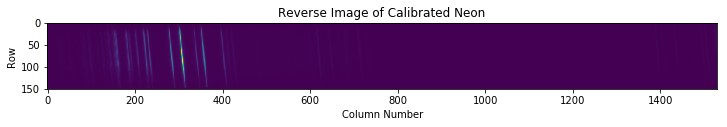

In [305]:
myimage1 = avneon - avneonbg
plt.imshow(myimage1)

myimage1.shape

vertcols = y

mysubimage = myimage1[:150, :]
myreversesubimage = mysubimage[:,::-1]

plt.imshow(myreversesubimage)
plt.title("Reverse Image of Calibrated Neon")
plt.xlabel('Column Number')
plt.ylabel('Row')
plt.show()

To find a good vector image of the calibrated neon, the following code adds in mutiple rows from the reverse image to generate the plot image of the spectrum.

In [306]:
myvector = myreversesubimage[50, :]

myvec70 = myreversesubimage[70, :]
myvec71 = myreversesubimage[71, :]
myvec72 = myreversesubimage[72, :]
myvec73 = myreversesubimage[73, :]
myvec74 = myreversesubimage[74, :]
myvec75 = myreversesubimage[75, :]
myvec76 = myreversesubimage[76, :]
myvec77 = myreversesubimage[77, :]
myvec78 = myreversesubimage[78, :]
myvec79 = myreversesubimage[79, :]

myaddedvec = myvec70 + myvec71 + myvec72 + myvec73 + myvec74 + myvec75 + myvec76 + myvec77 + myvec78 + myvec79

print ('Minimum of Vector for Neon: ',np.min(myaddedvec))

Minimum of Vector for Neon:  152.5


The columns of the reverse image are then calculated below, and then formated in an array in order to plot the data. The columns are not yet translated into angstroms, and thus not fully calibrated yet. The vector is then put in a graph vs the number of columns as shown below.

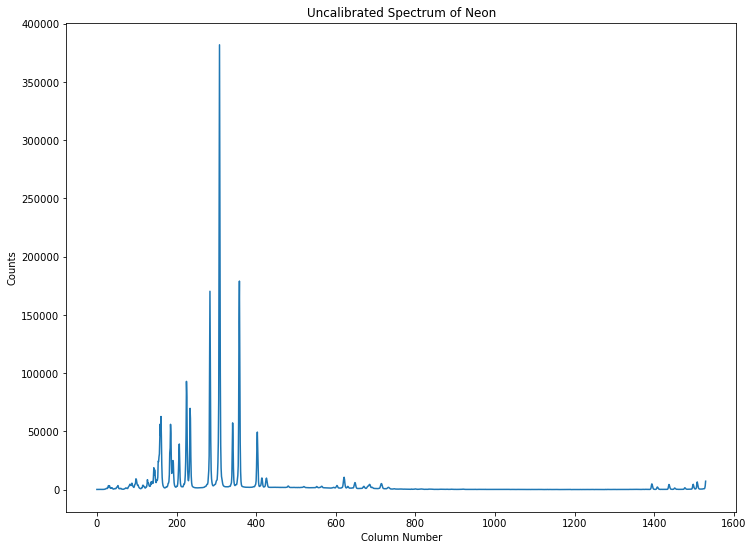

In [307]:
numberofcols = len(myaddedvec)
colnum = np.arange(numberofcols)

plt.plot(colnum, myaddedvec)
plt.title("Uncalibrated Spectrum of Neon")
plt.xlabel('Column Number')
plt.ylabel('Counts')
plt.show()

Now the column lines are calibrated, with a stretch to the spectrum of aproximately 4.25, with a shift of 5725 in order for the column counts to be calibrated into Angstroms in order to find the where the column lines match with the data for the absorption and emission lines. This plot is then shown below with the vector of the spectrum vs the calibrated columns in Angstroms. In order for the vector to not be below zero, the minimum of the vector is found and then added back plus one to the vector. This helps more for when the log of the vector is found.

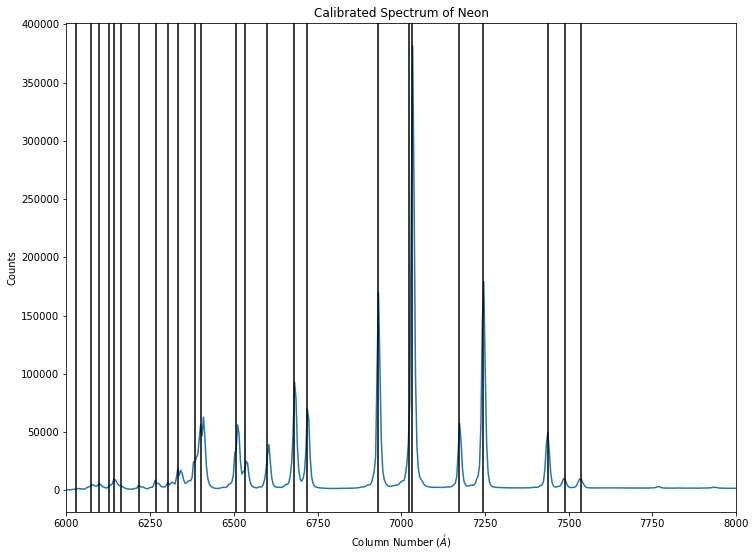

In [308]:
x = 4.25*colnum+5725
plt.plot(x, myaddedvec)
plt.title("Calibrated Spectrum of Neon")
plt.xlim(6000,8000)
plt.xlabel('Column Number ($\mathring A$)')
plt.ylabel('Counts')
for col in vertcols:
    plt.axvline(col, color='k')
plt.show()

Then a plot of the log of the vector is created vs the calibrated column numbers. This shows the peaks of the spectrum lining up with absorption and emission lines of the neon that are known. These peaks are more noticable with the log of the vector.

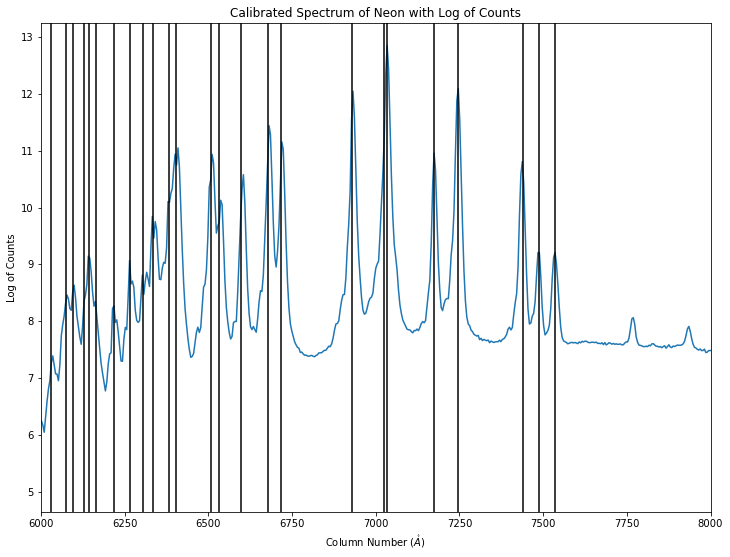

In [309]:
plt.plot(x, np.log(myaddedvec))
plt.title("Calibrated Spectrum of Neon with Log of Counts")
plt.xlim(6000,8000)
plt.xlabel('Column Number ($\mathring A$)')
plt.ylabel('Log of Counts')
for col in vertcols:
    plt.axvline(col, color='k')
plt.show()

The sky spectrum is then calculated, with the average of the sky frames minus the average of the dark and bias frames in order to retain a more calibrated solar spectrum with less noise. This spectrum is then reversed to get the wavelengths from red to blue. The spectrum image shows a few noticable absorption lines in the spectrum, but are not completely identifiable as the column numbers have not been calibrated to anstroms yet. They will be identified once calibrated, and the known lines of the solar spectrum columns are included.

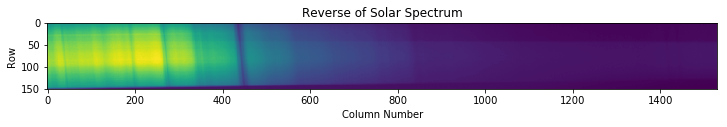

In [310]:
myimage2 = avsky - avdark - avbias

mysubimage1 = myimage2[:150, :]
myreversesubimage1 = mysubimage1[:,::-1]

plt.imshow(myreversesubimage1)
plt.title("Reverse of Solar Spectrum")
plt.xlabel('Column Number')
plt.ylabel('Row')
plt.show()

A vector of different rows of the reverse image of the solar spectrum are then added together for a complete vector of the spectrum to analyze. The min of this vector is then found, which is then added to the vector plus one, which helps with the log of the vector in later plots.

In [311]:
myvector1 = myreversesubimage1[50, :]

myvec70 = myreversesubimage1[70, :]
myvec71 = myreversesubimage1[71, :]
myvec72 = myreversesubimage1[72, :]
myvec73 = myreversesubimage1[73, :]
myvec74 = myreversesubimage1[74, :]
myvec75 = myreversesubimage1[75, :]
myvec76 = myreversesubimage1[76, :]
myvec77 = myreversesubimage1[77, :]
myvec78 = myreversesubimage1[78, :]
myvec79 = myreversesubimage1[79, :]
myaddedvec4 = myvec70 + myvec71 + myvec72 + myvec73 + myvec74 + myvec75 + myvec76 + myvec77 + myvec78 + myvec79

print ('Minimum of the Vector: ', np.min(myaddedvec4))



Minimum of the Vector:  -3173.94444444


A plot of the spectrum is then formed below, with the column not calibrated in angstroms yet.

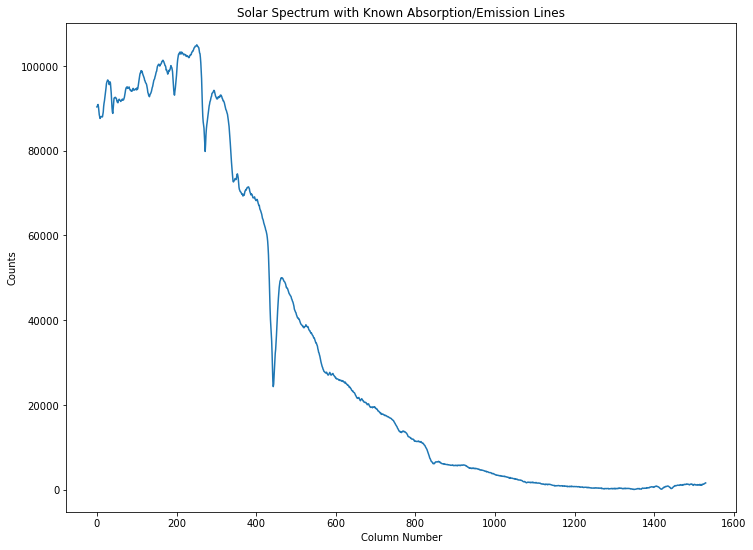

In [312]:
numberofcols = len(myaddedvec4)
colnum = np.arange(numberofcols)

plt.plot(colnum, myaddedvec4+3175)
plt.title("Solar Spectrum with Known Absorption/Emission Lines")
plt.xlabel('Column Number')
plt.ylabel('Counts')

A array is then created for the Fraunhofer lines of the absorption lines in the solar spectrum. The numbers correlate to the following elements, such that: 4307.7 is Ca (Calcium), 4307.9 is Fe (Iron), 4340.4 is H$\gamma$ (Hydrogen gamma), 4861.3 is H$\beta$ (Hydrogen beta), 5183.6 is Mg (Magnesium), 5875.6 is He (Helium), 5889.9 is Na (Sodium), 5895.9 is Na as well (Sodium), 6276 is $O_2$ (Oxygen), 6562.8 is H$\alpha$ as well (Hydrogen alpha), 6867 is $O_2$ as well for the Earth's atmosphere (Oxygen), 7250 is $H_2O$ (Water), and lastly 7593.7 is also $O_2$ (Oxygen) from the atmosphere again.

In [313]:
j = [4307.7, 4307.9, 4340.4, 4861.3, 5183.6, 5875.6, 5889.9, 5895.9, 6276, 6562.8, 6867, 7250, 7593.7]
vertcols = j

The following code plots the spectrum of the sky where the columns are calibrated into Angstroms ($\mathring A$), and then have the known solar absorption lines plotted in columns on the plot as well. This helps identify which absorption lines are within the spectrum that was taken from the sky.

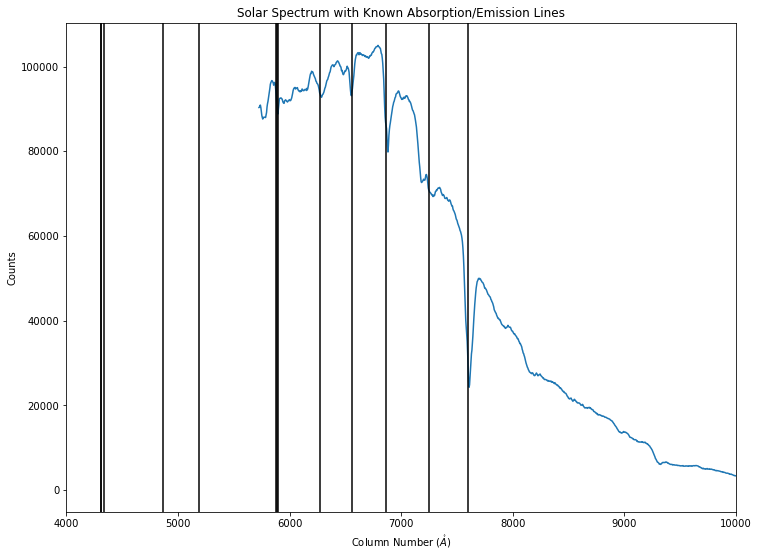

In [314]:
x = 4.25*colnum+5725
plt.plot(x, myaddedvec4+3175)
plt.title("Solar Spectrum with Known Absorption/Emission Lines")
plt.xlim(4000,10000)
plt.xlabel('Column Number ($\mathring A$)')
for col in vertcols:
    plt.axvline(col, color='k')
plt.ylabel('Counts')

A table of observations based on the known absorption lines and where they line up on the sky's spectrum:

|Absorption Line Number|Element Name|Line Profile/Shape|
|-----|----------------|--------------------------------------------------|
|4307.7 | Calcium (Ca) | Does not line up in Spectrum |
|4307.9 | Iron (Fe) | Does not line up with Spectrum |
|4340.4 | Hydrogen $\gamma$ (H$\gamma$) | Does not line up with Spectrum |
|4861.3 | Hydrogen $\beta$ (H$\beta$) | Does not line up with Spectrum |
|5183.6 | Magnesium (Mg) | Does not line up with Spectrum|
|5875.6 | Helium (He) | Lines up slightly, yet overlapped with 2 Sodium lines |
|5889.9 | Sodium (Na) | Lines up slightly, yet overlapped with Helium and another Sodium line |
|5895.9 | Sodium (Na) | Lines up slightly, yet overlapped with Helium and the other Sodium line |
|6276 | Oxygen ($O_2$) | Lines up with a dip in the solar spectrum |
|6562.8 | Hydrogen $\alpha$ (H$\alpha$) | Lines up with another dip in the spectrum |
|6867 | Oxygen ($O_2$) | Lines up with a slightly larger dip in the spectrum |
|7250 | Water ($H_2O$) | Lines up with a slight dip in the spectrum |
|7593.7 | Oxygen ($O_2$) | Lines up with the largest dip in the spectrum |

Some of the lines are broader than others as they have a higher abundance in the atmosphere. These lines are all in the absorption, as emission lines do not have atoms becoming excited into a particular high energy level by some other source between us and the sun. Thus the absorption lines are from the gas between us and the sun's photosphere.

The next plot is the same as the one above, however it includes a log of the counts instead of just the counts on the y-axis.

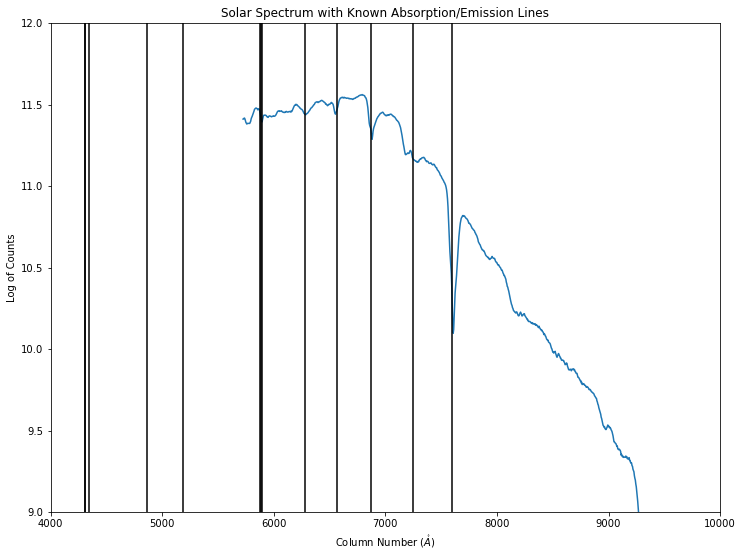

In [315]:
plt.plot(x, np.log(myaddedvec4+3175))
plt.title("Solar Spectrum with Known Absorption/Emission Lines")
plt.xlim(4000,10000)
plt.ylim(9,12)
plt.xlabel('Column Number ($\mathring A$)')
for col in vertcols:
    plt.axvline(col, color='k')
plt.ylabel('Log of Counts')

Here is a plot of the Solar spectrum that matches up with lines that are known from the solar spectrum, along with a few scattered lines of absorption from the atmosphere. The lines that match with the solar spectrum would include Helium (He), two lines of Sodium (Na), the first Oxygen line, and the Hydrogen $\alpha$ line. These lines have been labeled in the legend, and marked by different colors to differentiate between them. The other three lines listed are Oxygen, Water, and Oxygen again, which are just scattered absorption lines from the atmosphere of the Earth.

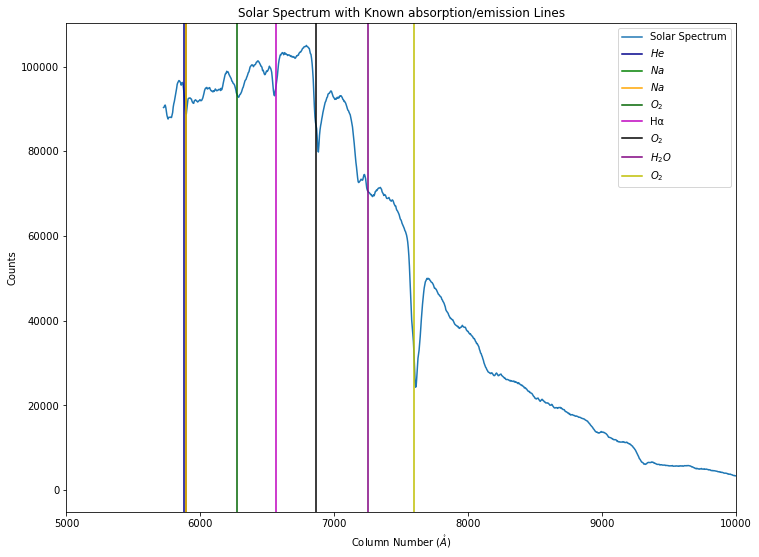

In [316]:
plt.plot(x, myaddedvec4+3175, label='Solar Spectrum')
plt.title("Solar Spectrum with Known absorption/emission Lines")
plt.xlim(5000,10000)
plt.xlabel('Column Number ($\mathring A$)')
plt.axvline(5875.6, color='darkblue', label = '$He$')
plt.axvline(5889.9, color='g', label = '$Na$') #each of the column lines need to be added separately for different colors and labels in the legend.
plt.axvline(5895.9, color='orange', label = '$Na$')
plt.axvline(6276, color='darkgreen', label = '$O_2$')
plt.axvline(6562.8, color='m', label = 'Hα')
plt.axvline(6867, color='k', label = '$O_2$')
plt.axvline(7250, color='purple', label = '$H_2O$')
plt.axvline(7593.7, color='y', label = '$O_2$')
plt.ylabel('Counts')
plt.legend()

The plot here is the same plot as above, but with a log of the vector of the spectrum to define where the absorption lines are more clearly.

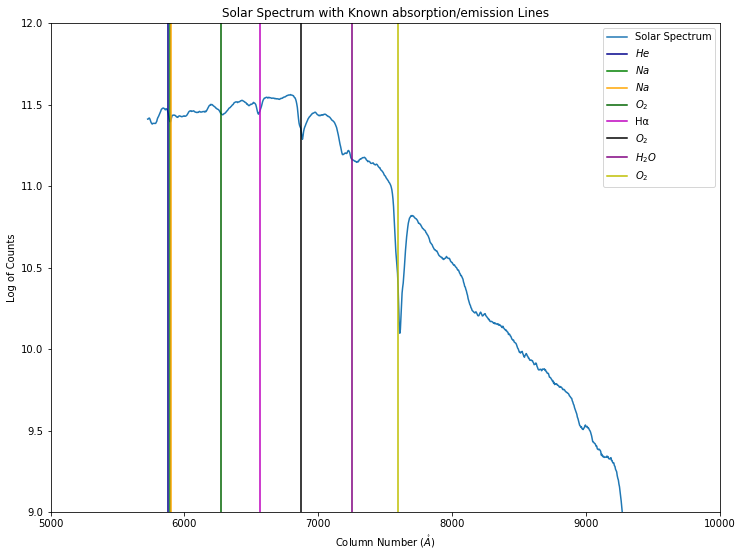

In [317]:
plt.plot(x, np.log(myaddedvec4+3175), label='Solar Spectrum')
plt.title("Solar Spectrum with Known absorption/emission Lines")
plt.xlim(5000,10000)
plt.ylim(9,12)
plt.xlabel('Column Number ($\mathring A$)')
plt.axvline(5875.6, color='darkblue', label = '$He$') #each of the column lines need to be added separately for different colors and labels in the legend.
plt.axvline(5889.9, color='g', label = '$Na$')
plt.axvline(5895.9, color='orange', label = '$Na$')
plt.axvline(6276, color='darkgreen', label = '$O_2$')
plt.axvline(6562.8, color='m', label = 'Hα')
plt.axvline(6867, color='k', label = '$O_2$')
plt.axvline(7250, color='purple', label = '$H_2O$')
plt.axvline(7593.7, color='y', label = '$O_2$')
plt.ylabel('Log of Counts')
plt.legend(loc='upper right')

The relative absorption depths of the features identified do not match the solar spectrum that is consulted for these lines. This is because of the different levels of the elements that are detected through the slit. These lines are important in our understanding of the Sun and similar stars as they can help show the spectral type of the stars given by the composition  of them and their temperatures. The composition is found through the absorption line elements given by the stars and our Sun. 

## Summary

The average of the bias and dark frame sums are used in order to lessen the noise within the telescope when taking the sky frames for the solar spectrum. These average sums are then subtracted from the sky frames when the loading up the solar spectrum that is to be analyzed. Then the neon background frames are used to lessen the noise when taking the neon frames. The neon frames are summed and averaged, which by subtracting the background of the neon, the spectrum of neon can be better analyzed for absorption lines. 

The neon spectrum is analyzed first in order to estimate the shift and stretch of the data for the column numbers to be converted into angstroms ($\mathring A$). The spectrum is reversed first in order to go from red to blue wavelengths, followed by adding in a sum of rows within the spectrum. Then column lines are added in for known neon lines, which help identify the stretch and shift within the spectrum data. 

Through this stretch and shift, the solar spectrum is then put in and reversed similar to the neon to go from red to blue wavelengths. The column numbers are converted using the same numbers as the stretch and shift of the neon spectrum. Then known absorption lines of the sun and the atmosphere are added in from Fraunhofer. With the absorption lines matching with the dips in the sky spectrum, 8 of the lines matched up, which can then be identified.

## Conclusion

The results found above present the known lines in the spectrum of the sky taken that includes both solar and atmospheric absorption lines. The lines from the sun are Helium (He), Sodium (Na), Oxygen ($O_2$), and Hydrogen $\alpha$ (H$\alpha$). Then the last 3 lines are absorption lines from the atmosphere, such as two Oxygen lines ($O_2$), and a absorption line for Water ($H_2O$). In order to line up the spectrum, the columns were shifted and stretched into angstroms ($\mathring A$). This stretch and shift is due to a good alignment of a stretch and shift of the neon spectrum. Thus there are 7 identifiable lines within the solar spectrum obtained.